## Import Basic Libraries

In [87]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sns

In [88]:
data = pd.read_csv('./dataset/Seasons09-18.csv')
display(data.head())
data.shape

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,15/08/09,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,...,5,7,15,14,4,6,2,2,0,0
1,15/08/09,Blackburn,Man City,0,2,A,0,1,A,M Dean,...,9,5,12,9,5,4,2,1,0,0
2,15/08/09,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,...,3,13,16,10,4,7,2,1,0,0
3,15/08/09,Chelsea,Hull,2,1,H,1,1,D,A Wiley,...,12,3,13,15,12,4,1,2,0,0
4,15/08/09,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,5,9,11,13,4,9,0,0,0,0


(3550, 22)

In [89]:
data2 = pd.read_csv('./dataset/Season17-18(only 18).csv')
display(data2.head())

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,10/8/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,...,6,4,11,8,2,5,2,1,0,0
1,11/8/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,...,4,1,11,9,7,4,1,1,0,0
2,11/8/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,...,6,9,9,11,5,5,1,2,0,0
3,11/8/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,...,1,4,9,8,2,5,2,1,0,0
4,11/8/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,...,2,5,11,12,3,5,2,2,0,0


In [90]:
All_team_names=data2['HomeTeam']
#print(All_team_names)

Unique_teams=[]    # Don't take duplicates
for team in All_team_names :
    if team not in Unique_teams:
        Unique_teams.append(team)
        
print("\n\nTeams that Are Playing in Season  2018-2019 :")
display(Unique_teams)



Teams that Are Playing in Season  2018-2019 :


['Man United',
 'Bournemouth',
 'Fulham',
 'Huddersfield',
 'Newcastle',
 'Watford',
 'Wolves',
 'Arsenal',
 'Liverpool',
 'Southampton',
 'Cardiff',
 'Chelsea',
 'Everton',
 'Leicester',
 'Tottenham',
 'West Ham',
 'Brighton',
 'Burnley',
 'Man City',
 'Crystal Palace']

In [91]:
# Create Dataframe
teams_df = pd.DataFrame(Unique_teams, columns=["Team Names"])
display(teams_df)

,Team Names
0,Man United
1,Bournemouth
2,Fulham
3,Huddersfield
4,Newcastle
5,Watford
6,Wolves
7,Arsenal
8,Liverpool
9,Southampton


In [92]:
#Exporting  in CSV file
teams_df.to_csv('./dataset/ Current Teams.csv', index=None)

In [93]:
#Check
print(teams_df[teams_df['Team Names'] == "Brighton"])

   Team Names
16   Brighton


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3550 non-null   object
 1   HomeTeam  3550 non-null   object
 2   AwayTeam  3550 non-null   object
 3   FTHG      3550 non-null   int64 
 4   FTAG      3550 non-null   int64 
 5   FTR       3550 non-null   object
 6   HTHG      3550 non-null   int64 
 7   HTAG      3550 non-null   int64 
 8   HTR       3550 non-null   object
 9   Referee   3550 non-null   object
 10  HS        3550 non-null   int64 
 11  AS        3550 non-null   int64 
 12  HST       3550 non-null   int64 
 13  AST       3550 non-null   int64 
 14  HF        3550 non-null   int64 
 15  AF        3550 non-null   int64 
 16  HC        3550 non-null   int64 
 17  AC        3550 non-null   int64 
 18  HY        3550 non-null   int64 
 19  AY        3550 non-null   int64 
 20  HR        3550 non-null   int64 
 21  AR        3550

In [95]:
# Let's check the win rate for Home Teams

Total_matches = data.shape[0] 
Total_features = data.shape[1] - 1

Total_Homewins = len(data[data.FTR == 'H'])
win_rate = (float(Total_Homewins)/(Total_matches))*100

print("Total No of matches: {}".format(Total_matches))
print("Total No of Features: {}".format(Total_features))
print("Number of matches won by Home Teams: {}".format(Total_Homewins))
print("Win rate of Home Teams : {}".format(win_rate))

Total No of matches: 3550
Total No of Features: 21
Number of matches won by Home Teams: 1632
Win rate of Home Teams : 45.97183098591549


In [98]:
# Generate Important info to learn about the teams!

def getTeamInfo(teamName):
    print("\n======================= Team : "+ teamName+"  Data  =====================\n")
    
    # Num of goals in wins and looses
    gamesHome = data[data['HomeTeam']== teamName] # Extracting as Dataframe
    totalGoalsScored = gamesHome['FTHG'].sum()    # Counting goals When team plays as Home team!
    
    gamesAway = data[data['AwayTeam'] == teamName] # When that same team plays as Away team!
    totalGames = gamesHome.append(gamesAway)
    numGames = len(totalGames.index)               # Total No of games played by that team!
    totalGoalsScored += gamesAway['FTAG'].sum()    # Total goals When that team plays both as Home team & Away team!
    
    
    #total goals allowed 
    totalGoalsAllowed = gamesHome['FTHG'].sum()
    totalGoalsAllowed += gamesAway['FTAG'].sum()
    
    #total yellow cards and red cards
    totalYellowCards = gamesHome['HY'].sum()
    totalYellowCards += gamesAway['AY'].sum()
    
    totalRedCards = gamesHome['HR'].sum()
    totalRedCards += gamesAway['AR'].sum()
    
    
    #total Fouls
    totalFouls = gamesHome['HF'].sum()
    totalFouls += gamesAway['AF'].sum()
    
    
    #total Corners
    totalCorners = gamesHome['HC'].sum()
    totalCorners += gamesAway['AC'].sum()
    
    
    #shots per game (SPG) [totalshots / totalgames]
    totalShots = gamesHome['HS'].sum()
    totalShots += gamesAway['AS'].sum()
    
    #avg shots allowed per game
    totalShotsAgainst = gamesHome['AS'].sum()
    totalShotsAgainst += gamesAway['HS'].sum()
    if numGames != 0:
        HSPG = totalShots / numGames         #HomeShotsPerGame
        ASPG = totalShotsAgainst / numGames #AwayShotsPerGame
        display("HSPG: {}".format(HSPG))
        display("ASPG: {}".format(ASPG))
    
    #games won percentage [GamesWon / numGames]
    gamesWon = totalGames[totalGames['FTR']== "H"]
    gamesLost = totalGames[totalGames['FTR'] == "A"]
    gamesDraw = totalGames[totalGames['FTR'] == "D"]
    numGamesWon = len(gamesWon.index)
    numGamesLost = len(gamesLost.index)
    numGamesDraw = len(gamesDraw.index)
    
    if numGames != 0:
        gamesWonPercent = numGamesWon / numGames
        gamesLostPercent = numGamesLost / numGames
        gamesDrawPercent = numGamesDraw / numGames 
    
    print("Games Win Percent: {}".format(gamesWonPercent))
    print("Games Loose Percent: {}".format(gamesLostPercent))
    print("Games Draw Percent: {}".format(gamesDrawPercent))
    
    
    #Total shots on target:
    totalShotsOnTarget = gamesHome['HST'].sum()
    totalShotsOnTarget += gamesAway['AST'].sum()
    
    #GoalSaves
    goalSaves = totalShotsOnTarget - totalGoalsAllowed
    
    #Goal Save Percentage
    if totalShotsOnTarget != 0:
        goalSavesPercent = goalSaves / totalShotsOnTarget
        
    #Goal Save Ratio
    if goalSaves != 0:
        saveRatio = totalShotsOnTarget / goalSaves
    
    #Goal scoring Percent
    if totalShots != 0 :
        scoringPercent = (totalShots - totalGoalsScored)/totalShots
    
    #Goal scoring Ratio
    if totalGoalsScored != 0:
        scoringRatio = totalShotsOnTarget / totalGoalsScored
        
    if numGames == 0: 
        gamesWon = 0
        gamesLost = 0
        gamesDraw = 0 
        totalGoalsScored = 0 
        totalShotsOnTarget = 0 
        totalGoalsAllowed = 0 
        totalYellowCards = 0 
        totalRedCards = 0 
        totalFouls = 0 
        totalCorners = 0 
        totalShots = 0 
        totalShotsAgainst = 0 
        HSPG = 0             #HomeShotsPerGame 
        ASPG = 0             #AwayShotsPerGame 
        goalSaves = 0 
        goalSavesPercent = 0 
        scoringPercent = 0 
        saveRatio = 0 
        scoringRatio = 0
    
    return [teamName, totalGoalsScored, totalShotsOnTarget, totalGoalsAllowed, 
            totalYellowCards, totalRedCards,totalFouls, totalCorners, 
            totalShots, totalShotsAgainst, HSPG, ASPG, goalSaves, goalSavesPercent, scoringPercent,
            saveRatio, scoringRatio]


In [99]:
# Let's check
getTeamInfo('Liverpool')


======================= Team : Liverpool  Data  =====================



'HSPG: 15.80281690140845'

'ASPG: 9.794366197183098'

Games Win Percent: 0.4647887323943662
Games Loose Percent: 0.28169014084507044
Games Draw Percent: 0.2535211267605634


['Liverpool',
 642,
 2471,
 642,
 520,
 23,
 3709,
 2311,
 5610,
 3477,
 15.80281690140845,
 9.794366197183098,
 1829,
 0.7401861594496155,
 0.8855614973262033,
 1.3510114816839802,
 3.8489096573208723]

In [100]:
# Gather All Team Stats

All_Teams_Info = []      # A list of lists
for team in Unique_teams:
    single_team_info = getTeamInfo(team)  # Getting each team's info
    print(single_team_info)
    All_Teams_Info.append(single_team_info)
    print(All_Teams_Info)



======================= Team : Man United  Data  =====================



'HSPG: 14.07887323943662'

'ASPG: 10.904225352112675'

Games Win Percent: 0.4788732394366197
Games Loose Percent: 0.30985915492957744
Games Draw Percent: 0.2112676056338028
['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293]]

======================= Team : Bournemouth  Data  =====================



'HSPG: 12.118110236220472'

'ASPG: 13.511811023622048'

Games Win Percent: 0.4330708661417323
Games Loose Percent: 0.31496062992125984
Games Draw Percent: 0.25196850393700787
['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162]]

======================= Team : Fulham  Data  =====================



'HSPG: 11.51231527093596'

'ASPG: 14.305418719211822'

Games Win Percent: 0.4827586206896552
Games Loose Percent: 0.2561576354679803
Games Draw Percent: 0.26108374384236455
['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667]]

======================= Team : Huddersfield  Data  =====================



'HSPG: 9.843137254901961'

'ASPG: 11.882352941176471'

Games Win Percent: 0.4117647058823529
Games Loose Percent: 0.3137254901960784
Games Draw Percent: 0.27450980392156865
['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.9282868525896414, 1.305084745762712, 4.277777777777778]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.9282868525896414, 1.

'HSPG: 12.157706093189963'

'ASPG: 12.637992831541219'

Games Win Percent: 0.4838709677419355
Games Loose Percent: 0.2903225806451613
Games Draw Percent: 0.22580645161290322
['Newcastle', 334, 1431, 334, 457, 29, 3088, 1385, 3392, 3526, 12.157706093189963, 12.637992831541219, 1097, 0.76659678546471, 0.9015330188679245, 1.3044667274384685, 4.2844311377245505]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.928286852589

'HSPG: 11.48031496062992'

'ASPG: 12.472440944881889'

Games Win Percent: 0.49606299212598426
Games Loose Percent: 0.2992125984251969
Games Draw Percent: 0.2047244094488189
['Watford', 141, 465, 141, 247, 13, 1574, 588, 1458, 1584, 11.48031496062992, 12.472440944881889, 324, 0.6967741935483871, 0.9032921810699589, 1.4351851851851851, 3.297872340425532]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.9282868525896414,

'HSPG: 10.582677165354331'

'ASPG: 13.803149606299213'

Games Win Percent: 0.41732283464566927
Games Loose Percent: 0.33070866141732286
Games Draw Percent: 0.25196850393700787
['Wolves', 130, 703, 130, 211, 10, 1424, 726, 1344, 1753, 10.582677165354331, 13.803149606299213, 573, 0.8150782361308677, 0.9032738095238095, 1.2268760907504364, 5.407692307692308]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.928286852589641

'HSPG: 14.971830985915492'

'ASPG: 10.433802816901409'

Games Win Percent: 0.49295774647887325
Games Loose Percent: 0.29295774647887324
Games Draw Percent: 0.2140845070422535
['Arsenal', 684, 2495, 684, 540, 31, 3592, 2248, 5315, 3704, 14.971830985915492, 10.433802816901409, 1811, 0.7258517034068136, 0.871307619943556, 1.3776918829376035, 3.6476608187134505]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.928286852589

'HSPG: 15.80281690140845'

'ASPG: 9.794366197183098'

Games Win Percent: 0.4647887323943662
Games Loose Percent: 0.28169014084507044
Games Draw Percent: 0.2535211267605634
['Liverpool', 642, 2471, 642, 520, 23, 3709, 2311, 5610, 3477, 15.80281690140845, 9.794366197183098, 1829, 0.7401861594496155, 0.8855614973262033, 1.3510114816839802, 3.8489096573208723]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.928286852589

'HSPG: 13.356846473029046'

'ASPG: 11.269709543568466'

Games Win Percent: 0.4149377593360996
Games Loose Percent: 0.2946058091286307
Games Draw Percent: 0.29045643153526973
['Southampton', 304, 1156, 304, 365, 16, 2695, 1349, 3219, 2716, 13.356846473029046, 11.269709543568466, 852, 0.7370242214532872, 0.9055607331469401, 1.3568075117370892, 3.8026315789473686]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.928286852

'HSPG: 11.098039215686274'

'ASPG: 16.92156862745098'

Games Win Percent: 0.49019607843137253
Games Loose Percent: 0.29411764705882354
Games Draw Percent: 0.21568627450980393
['Cardiff', 43, 165, 43, 69, 2, 477, 249, 566, 863, 11.098039215686274, 16.92156862745098, 122, 0.7393939393939394, 0.9240282685512368, 1.3524590163934427, 3.8372093023255816]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.9282868525896414, 1.3

'HSPG: 16.098591549295776'

'ASPG: 10.36338028169014'

Games Win Percent: 0.4788732394366197
Games Loose Percent: 0.30704225352112674
Games Draw Percent: 0.2140845070422535
['Chelsea', 690, 2510, 690, 562, 30, 3704, 2270, 5715, 3679, 16.098591549295776, 10.36338028169014, 1820, 0.7250996015936255, 0.8792650918635171, 1.379120879120879, 3.63768115942029]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.9282868525896414

'HSPG: 13.014084507042254'

'ASPG: 12.261971830985916'

Games Win Percent: 0.4591549295774648
Games Loose Percent: 0.22535211267605634
Games Draw Percent: 0.3154929577464789
['Everton', 510, 2079, 510, 539, 26, 3915, 1999, 4620, 4353, 13.014084507042254, 12.261971830985916, 1569, 0.7546897546897547, 0.8896103896103896, 1.3250478011472275, 4.076470588235294]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.9282868525896

'HSPG: 12.103030303030303'

'ASPG: 13.666666666666666'

Games Win Percent: 0.4666666666666667
Games Loose Percent: 0.2787878787878788
Games Draw Percent: 0.2545454545454545
['Leicester', 236, 672, 236, 241, 17, 1815, 878, 1997, 2255, 12.103030303030303, 13.666666666666666, 436, 0.6488095238095238, 0.8818227341011518, 1.5412844036697249, 2.847457627118644]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.928286852589641

'HSPG: 15.88169014084507'

'ASPG: 10.988732394366197'

Games Win Percent: 0.4535211267605634
Games Loose Percent: 0.3183098591549296
Games Draw Percent: 0.22816901408450704
['Tottenham', 619, 2576, 619, 551, 18, 3726, 2328, 5638, 3901, 15.88169014084507, 10.988732394366197, 1957, 0.7597049689440993, 0.8902092940759134, 1.316300459887583, 4.161550888529887]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.9282868525896

'HSPG: 12.1198738170347'

'ASPG: 14.794952681388013'

Games Win Percent: 0.45110410094637227
Games Loose Percent: 0.26813880126182965
Games Draw Percent: 0.2807570977917981
['West Ham', 393, 1530, 393, 556, 25, 3449, 1627, 3842, 4690, 12.1198738170347, 14.794952681388013, 1137, 0.7431372549019608, 0.8977095262883915, 1.345646437994723, 3.8931297709923665]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.9282868525896

'HSPG: 9.509803921568627'

'ASPG: 15.372549019607844'

Games Win Percent: 0.5294117647058824
Games Loose Percent: 0.1568627450980392
Games Draw Percent: 0.3137254901960784
['Brighton', 48, 153, 48, 82, 3, 597, 208, 485, 784, 9.509803921568627, 15.372549019607844, 105, 0.6862745098039216, 0.9010309278350516, 1.457142857142857, 3.1875]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.9282868525896414, 1.305084745762712,

'HSPG: 10.393939393939394'

'ASPG: 16.048484848484847'

Games Win Percent: 0.48484848484848486
Games Loose Percent: 0.2727272727272727
Games Draw Percent: 0.24242424242424243
['Burnley', 158, 634, 158, 277, 6, 1741, 705, 1715, 2648, 10.393939393939394, 16.048484848484847, 476, 0.750788643533123, 0.9078717201166181, 1.3319327731092436, 4.012658227848101]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.9282868525896414,

'HSPG: 16.064788732394366'

'ASPG: 9.236619718309859'

Games Win Percent: 0.49295774647887325
Games Loose Percent: 0.30704225352112674
Games Draw Percent: 0.2
['Man City', 774, 2533, 774, 597, 24, 3784, 2475, 5703, 3279, 16.064788732394366, 9.236619718309859, 1759, 0.6944334780892223, 0.864281956864808, 1.4400227401932917, 3.272609819121447]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.9282868525896414, 1.30508474

'HSPG: 11.704433497536947'

'ASPG: 13.625615763546797'

Games Win Percent: 0.39901477832512317
Games Loose Percent: 0.3891625615763547
Games Draw Percent: 0.21182266009852216
['Crystal Palace', 222, 769, 222, 350, 8, 2441, 1079, 2376, 2766, 11.704433497536947, 13.625615763546797, 547, 0.7113133940182055, 0.9065656565656566, 1.4058500914076781, 3.463963963963964]
[['Man United', 656, 2293, 656, 577, 23, 3931, 2206, 4998, 3871, 14.07887323943662, 10.904225352112675, 1637, 0.7139119058002616, 0.8687474989995998, 1.4007330482590103, 3.495426829268293], ['Bournemouth', 167, 521, 167, 179, 6, 1184, 709, 1539, 1716, 12.118110236220472, 13.511811023622048, 354, 0.6794625719769674, 0.8914879792072774, 1.4717514124293785, 3.1197604790419162], ['Fulham', 240, 1204, 240, 279, 7, 2122, 981, 2337, 2904, 11.51231527093596, 14.305418719211822, 964, 0.8006644518272426, 0.8973042362002568, 1.2489626556016598, 5.016666666666667], ['Huddersfield', 36, 154, 36, 80, 4, 536, 219, 502, 606, 9.843137254901961, 11.882352941176471, 118, 0.7662337662337663, 0.92828685

In [101]:
# Store All teams info as a dataframe
Stats_df = pd.DataFrame(All_Teams_Info, columns=['TeamName', 'totalGoalsScored', 'totalShotsOnTarget', 'totalGoalsAllowed', 
            'totalYellowCards', 'totalRedCards','totalFouls', 'totalCorners','totalShots', 'totalShotsAgainst', 'HSPG', 'ASPG', 
            'goalSaves', 'goalSavesPercent', 'scoringPercent','saveRatio', 'scoringRatio'])

In [102]:
display(Stats_df) 

,TeamName,totalGoalsScored,totalShotsOnTarget,totalGoalsAllowed,totalYellowCards,totalRedCards,totalFouls,totalCorners,totalShots,totalShotsAgainst,HSPG,ASPG,goalSaves,goalSavesPercent,scoringPercent,saveRatio,scoringRatio
0,Man United,656,2293,656,577,23,3931,2206,4998,3871,14.078873,10.904225,1637,0.713912,0.868747,1.400733,3.495427
1,Bournemouth,167,521,167,179,6,1184,709,1539,1716,12.118110,13.511811,354,0.679463,0.891488,1.471751,3.119760
2,Fulham,240,1204,240,279,7,2122,981,2337,2904,11.512315,14.305419,964,0.800664,0.897304,1.248963,5.016667
3,Huddersfield,36,154,36,80,4,536,219,502,606,9.843137,11.882353,118,0.766234,0.928287,1.305085,4.277778
4,Newcastle,334,1431,334,457,29,3088,1385,3392,3526,12.157706,12.637993,1097,0.766597,0.901533,1.304467,4.284431
5,Watford,141,465,141,247,13,1574,588,1458,1584,11.480315,12.472441,324,0.696774,0.903292,1.435185,3.297872
6,Wolves,130,703,130,211,10,1424,726,1344,1753,10.582677,13.803150,573,0.815078,0.903274,1.226876,5.407692
7,Arsenal,684,2495,684,540,31,3592,2248,5315,3704,14.971831,10.433803,1811,0.725852,0.871308,1.377692,3.647661
8,Liverpool,642,2471,642,520,23,3709,2311,5610,3477,15.802817,9.794366,1829,0.740186,0.885561,1.351011,3.848910
9,Southampton,304,1156,304,365,16,2695,1349,3219,2716,13.356846,11.269710,852,0.737024,0.905561,1.356808,3.802632


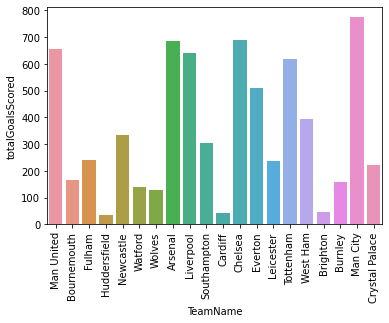

In [41]:
# Plotting totalGoalsScored
total_goals_scored = sns.barplot(Stats_df.TeamName,Stats_df.totalGoalsScored) 
#print(total_goals_scored)  ------ x-axis labels get overlapped!

for i in total_goals_scored.get_xticklabels():
    i.set_rotation(90)       # Rotating x-axis labels by 90 degree to avoid overlapping!


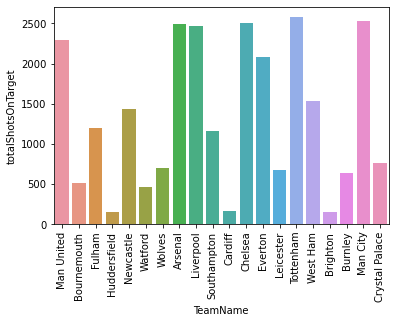

In [42]:
# Plotting totalShotsOnTarget
shots_on_target = sns.barplot(Stats_df.TeamName, Stats_df.totalShotsOnTarget)
for item in shots_on_target.get_xticklabels():
    item.set_rotation(90)

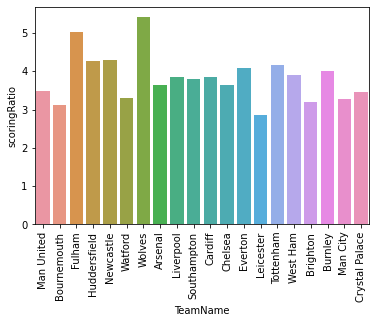

In [43]:
# Plotting Scoring_ratio
Scoring_ratio = sns.barplot(Stats_df.TeamName, Stats_df.scoringRatio) 
for item in Scoring_ratio.get_xticklabels():
    item.set_rotation(90)

In [44]:
# Check for NaN values
data.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [45]:
Stats_df.isnull().sum()

TeamName              0
totalGoalsScored      0
totalShotsOnTarget    0
totalGoalsAllowed     0
totalYellowCards      0
totalRedCards         0
totalFouls            0
totalCorners          0
totalShots            0
totalShotsAgainst     0
HSPG                  0
ASPG                  0
goalSaves             0
goalSavesPercent      0
scoringPercent        0
saveRatio             0
scoringRatio          0
dtype: int64

In [103]:
# Separate all current teams data from main dataset(Seasons09-18.csv)
current_only = data[(data.HomeTeam.isin(Unique_teams))]

print(len(data.HomeTeam.unique()))           #  36 teams appeared in the past!
print(len(current_only.HomeTeam.unique()))


36
20


In [104]:
# newly modified final dataset (Only considering current teams )
data = current_only[(current_only.AwayTeam.isin(Unique_teams))]
data

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
4,15/08/09,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,5,9,11,13,4,9,0,0,0,0
7,15/08/09,Wolves,West Ham,0,2,A,0,1,A,C Foy,...,11,13,9,5,8,6,0,0,0,0
9,16/08/09,Tottenham,Liverpool,2,1,H,1,0,H,P Dowd,...,11,3,14,16,6,5,3,3,0,0
13,19/08/09,Burnley,Man United,1,0,H,1,0,H,A Wiley,...,2,9,8,12,1,12,2,1,0,0
19,22/08/09,Man City,Wolves,1,0,H,1,0,H,L Mason,...,11,2,7,11,5,6,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,24/11/18,Watford,Liverpool,0,3,A,0,0,D,J Moss,...,1,7,12,13,5,5,0,0,0,1
3546,24/11/18,West Ham,Man City,0,4,A,0,3,A,A Marriner,...,1,6,6,3,8,1,0,0,0,0
3547,25/11/18,Bournemouth,Arsenal,1,2,A,1,1,D,C Pawson,...,5,4,6,9,5,8,2,1,0,0
3548,25/11/18,Wolves,Huddersfield,0,2,A,0,1,A,K Friend,...,3,6,9,8,3,5,1,2,0,0


In [105]:
# Separate independent & dependent variables
X = data.drop(['FTR','Date','HTR','Referee'],1)
Y = data['FTR']

# print(X)
# print(Y)

In [106]:
# Standardising the data
from sklearn.preprocessing import scale
cols = [['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]

for col in cols:
    #print(col)
    X[col] = scale(X[col])

In [107]:
X

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
4,Everton,Arsenal,-0.468098,3.962821,-0.855028,3.250396,-1.096918,0.763035,-0.215128,1.607965,0.108041,0.518083,-0.643271,1.584600,-1.234118,-1.407056,-0.250749,-0.297376
7,Wolves,West Ham,-1.231945,0.637625,-0.855028,0.604150,0.844961,0.972765,1.590258,3.066255,-0.484798,-1.737169,0.665996,0.440817,-1.234118,-1.407056,-0.250749,-0.297376
9,Tottenham,Liverpool,0.295748,-0.193674,0.320047,-0.718974,0.491892,-1.124532,1.590258,-0.579471,0.997299,1.363803,0.011362,0.059556,1.177241,0.948871,-0.250749,-0.297376
13,Burnley,Man United,-0.468098,-1.024973,0.320047,-0.718974,-1.096918,1.392224,-1.117821,1.607965,-0.781217,0.236177,-1.625222,2.728384,0.373455,-0.621747,-0.250749,-0.297376
19,Man City,Wolves,-0.468098,-1.024973,0.320047,-0.718974,0.315358,-0.285613,1.590258,-0.944044,-1.077637,-0.045730,-0.315955,0.440817,-1.234118,-0.621747,-0.250749,-0.297376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,Watford,Liverpool,-1.231945,1.468924,-0.855028,-0.718974,-1.626521,-0.285613,-1.418718,0.878820,0.404460,0.518083,-0.315955,0.059556,-1.234118,-1.407056,-0.250749,3.103158
3546,West Ham,Man City,-1.231945,2.300223,-0.855028,3.250396,-0.920383,-0.495343,-1.418718,0.514247,-1.374056,-2.300982,0.665996,-1.465488,-1.234118,-1.407056,-0.250749,-0.297376
3547,Bournemouth,Arsenal,-0.468098,0.637625,0.320047,0.604150,-0.567314,1.811683,-0.215128,-0.214898,-1.374056,-0.609543,-0.315955,1.203339,0.373455,-0.621747,-0.250749,-0.297376
3548,Wolves,Huddersfield,-1.231945,0.637625,-0.855028,0.604150,-0.390780,0.553305,-0.816923,0.514247,-0.484798,-0.891449,-0.970588,0.059556,-0.430332,0.163562,-0.250749,-0.297376


In [108]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 4 to 3549
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HomeTeam  1498 non-null   object 
 1   AwayTeam  1498 non-null   object 
 2   FTHG      1498 non-null   float64
 3   FTAG      1498 non-null   float64
 4   HTHG      1498 non-null   float64
 5   HTAG      1498 non-null   float64
 6   HS        1498 non-null   float64
 7   AS        1498 non-null   float64
 8   HST       1498 non-null   float64
 9   AST       1498 non-null   float64
 10  HF        1498 non-null   float64
 11  AF        1498 non-null   float64
 12  HC        1498 non-null   float64
 13  AC        1498 non-null   float64
 14  HY        1498 non-null   float64
 15  AY        1498 non-null   float64
 16  HR        1498 non-null   float64
 17  AR        1498 non-null   float64
dtypes: float64(16), object(2)
memory usage: 222.4+ KB


In [109]:
# Convert Categorical features into Numerical Features!

def feature_columns(df):
    
    # Initialize new output DataFrame with the indices 
    output = pd.DataFrame(index = df.index)
    
    # Investigate each feature column for the data
    for col, col_data in df.iteritems():              #iteritems()-Iterates over the DataFrame columns,returns a tuple with the column name and the column entries!

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:                   # From X.info() ,We can see that when data is categorical ,it's dtype is object!
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the final columns
        output = output.join(col_data)
    
    return output

In [110]:
X =feature_columns(X)

print ("Number of feature columns ({} Features):\n{}".format(len(X.columns), list(X.columns)))

Number of feature columns (56 Features):
['HomeTeam_Arsenal', 'HomeTeam_Bournemouth', 'HomeTeam_Brighton', 'HomeTeam_Burnley', 'HomeTeam_Cardiff', 'HomeTeam_Chelsea', 'HomeTeam_Crystal Palace', 'HomeTeam_Everton', 'HomeTeam_Fulham', 'HomeTeam_Huddersfield', 'HomeTeam_Leicester', 'HomeTeam_Liverpool', 'HomeTeam_Man City', 'HomeTeam_Man United', 'HomeTeam_Newcastle', 'HomeTeam_Southampton', 'HomeTeam_Tottenham', 'HomeTeam_Watford', 'HomeTeam_West Ham', 'HomeTeam_Wolves', 'AwayTeam_Arsenal', 'AwayTeam_Bournemouth', 'AwayTeam_Brighton', 'AwayTeam_Burnley', 'AwayTeam_Cardiff', 'AwayTeam_Chelsea', 'AwayTeam_Crystal Palace', 'AwayTeam_Everton', 'AwayTeam_Fulham', 'AwayTeam_Huddersfield', 'AwayTeam_Leicester', 'AwayTeam_Liverpool', 'AwayTeam_Man City', 'AwayTeam_Man United', 'AwayTeam_Newcastle', 'AwayTeam_Southampton', 'AwayTeam_Tottenham', 'AwayTeam_Watford', 'AwayTeam_West Ham', 'AwayTeam_Wolves', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 

In [111]:
# Show the feature information
display(X.head())

,HomeTeam_Arsenal,HomeTeam_Bournemouth,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cardiff,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Fulham,HomeTeam_Huddersfield,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
4,0,0,0,0,0,0,0,1,0,0,...,-0.215128,1.607965,0.108041,0.518083,-0.643271,1.584600,-1.234118,-1.407056,-0.250749,-0.297376
7,0,0,0,0,0,0,0,0,0,0,...,1.590258,3.066255,-0.484798,-1.737169,0.665996,0.440817,-1.234118,-1.407056,-0.250749,-0.297376
9,0,0,0,0,0,0,0,0,0,0,...,1.590258,-0.579471,0.997299,1.363803,0.011362,0.059556,1.177241,0.948871,-0.250749,-0.297376
13,0,0,0,1,0,0,0,0,0,0,...,-1.117821,1.607965,-0.781217,0.236177,-1.625222,2.728384,0.373455,-0.621747,-0.250749,-0.297376
19,0,0,0,0,0,0,0,0,0,0,...,1.590258,-0.944044,-1.077637,-0.045730,-0.315955,0.440817,-1.234118,-0.621747,-0.250749,-0.297376


In [112]:
# Train-test Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, 
                                                    test_size =.3,     # taking 5o samples as test set
                                                    random_state = 1,
                                                    stratify =Y)

In [113]:
print(X_test.shape)

(450, 56)


## Logistic Regression Model

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [116]:
model.predict(X_test)

array(['H', 'H', 'H', 'D', 'A', 'H', 'A', 'D', 'H', 'H', 'H', 'D', 'A',
       'H', 'H', 'H', 'D', 'A', 'A', 'H', 'H', 'H', 'D', 'H', 'A', 'H',
       'D', 'H', 'H', 'A', 'D', 'H', 'H', 'H', 'H', 'A', 'A', 'H', 'H',
       'D', 'D', 'H', 'D', 'D', 'A', 'A', 'D', 'A', 'A', 'A', 'H', 'A',
       'H', 'A', 'H', 'H', 'H', 'A', 'H', 'D', 'H', 'H', 'D', 'A', 'H',
       'A', 'H', 'A', 'H', 'H', 'D', 'D', 'H', 'A', 'H', 'D', 'H', 'H',
       'D', 'A', 'H', 'D', 'A', 'A', 'D', 'D', 'H', 'H', 'A', 'H', 'A',
       'D', 'H', 'H', 'H', 'D', 'H', 'D', 'H', 'D', 'D', 'H', 'D', 'D',
       'D', 'A', 'D', 'H', 'H', 'A', 'D', 'A', 'H', 'D', 'D', 'D', 'A',
       'H', 'H', 'H', 'D', 'D', 'H', 'H', 'H', 'D', 'D', 'H', 'H', 'H',
       'A', 'H', 'H', 'H', 'H', 'A', 'H', 'H', 'A', 'H', 'H', 'H', 'H',
       'H', 'A', 'H', 'A', 'H', 'A', 'D', 'D', 'A', 'A', 'D', 'H', 'H',
       'H', 'H', 'D', 'H', 'D', 'A', 'H', 'H', 'A', 'D', 'A', 'A', 'H',
       'H', 'D', 'H', 'A', 'H', 'H', 'A', 'H', 'A', 'H', 'A', 'A

In [117]:
# model.predict_proba(X_test)   # predict_proba gives you the probabilities for the target in array form. The number of probabilities for each row is equal to the number of categories in target variable.

In [118]:
Probability = model.predict_proba(X_test)

# Store as dataframe
Table = pd.DataFrame(Probability, columns=['Away Team Wins','Draw','Home Team Wins'])

display((Table *100).head(10))

,Away Team Wins,Draw,Home Team Wins
0,1.567616e-07,4.736061e-02,99.952639
1,3.153388e-16,1.146533e-06,99.999999
2,5.966942e-13,4.008715e-05,99.999960
3,6.558424e+00,8.853384e+01,4.907731
4,9.018751e+01,9.808330e+00,0.004161
5,3.718302e-08,1.573529e-02,99.984265
6,9.171566e+01,8.281518e+00,0.002820
7,8.919692e+00,8.547381e+01,5.606498
8,4.964335e-03,5.414110e+00,94.580925
9,3.307401e-20,8.254518e-09,100.000000


In [150]:
#predicting the test set resuults
y_prediction=model.predict(X_test)

#calculating the accuracy score
from sklearn.metrics import accuracy_score 
accuracy=accuracy_score(y_test,y_prediction)

print(accuracy)

1.0


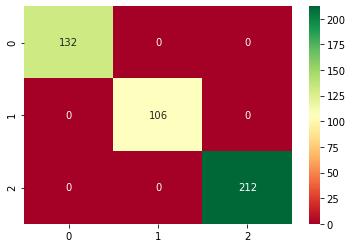

In [159]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction)

sns.heatmap(cm,cmap='RdYlGn',annot=True,fmt='d')


## Support Vector Machine Model

In [121]:
from sklearn.svm import SVC

In [122]:
model1 = SVC()
model1.fit(X_train, y_train)

SVC()

In [123]:
model1.predict(X_test)  # In case of SVC,predict_proba(X_test) don't work like logistic regression !

array(['H', 'H', 'H', 'D', 'A', 'H', 'A', 'D', 'H', 'H', 'H', 'D', 'A',
       'H', 'H', 'H', 'D', 'A', 'A', 'H', 'H', 'H', 'D', 'H', 'A', 'H',
       'D', 'H', 'H', 'A', 'A', 'H', 'H', 'H', 'H', 'A', 'A', 'H', 'H',
       'D', 'D', 'H', 'D', 'D', 'A', 'A', 'D', 'A', 'A', 'A', 'H', 'A',
       'H', 'A', 'H', 'D', 'H', 'A', 'H', 'D', 'H', 'H', 'D', 'A', 'H',
       'A', 'H', 'A', 'H', 'H', 'D', 'D', 'H', 'A', 'H', 'D', 'H', 'H',
       'D', 'A', 'H', 'D', 'A', 'A', 'D', 'D', 'D', 'H', 'A', 'H', 'A',
       'D', 'H', 'H', 'H', 'D', 'H', 'D', 'H', 'D', 'D', 'H', 'D', 'D',
       'D', 'A', 'D', 'H', 'H', 'A', 'A', 'A', 'H', 'D', 'D', 'D', 'A',
       'H', 'H', 'H', 'D', 'D', 'H', 'H', 'H', 'H', 'D', 'H', 'H', 'H',
       'A', 'H', 'H', 'H', 'D', 'A', 'H', 'H', 'A', 'H', 'H', 'H', 'H',
       'H', 'A', 'H', 'A', 'H', 'A', 'D', 'D', 'A', 'A', 'D', 'H', 'H',
       'H', 'H', 'D', 'H', 'D', 'A', 'H', 'H', 'A', 'D', 'A', 'A', 'D',
       'H', 'D', 'H', 'A', 'H', 'H', 'A', 'H', 'A', 'H', 'A', 'A

In [124]:
#predicting the test set resuults
y_pred=model1.predict(X_test)

#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

#calculating the accuracy score
from sklearn.metrics import accuracy_score 
acc=accuracy_score(y_test,y_pred)

print(cm)
print(acc)

[[131   1   0]
 [  3 101   2]
 [  0   6 206]]
0.9733333333333334


## Test with Completely New Data from Season18-19

In [132]:
data3=pd.read_csv('./dataset/Test_Season-1819.csv')
data3

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,10/8/2018,Man United,Leicester,2,1,H,1,0,8,13,6,4,11,8,2,5,2,1,0,0
1,11/8/2018,Bournemouth,Cardiff,2,0,H,1,0,12,10,4,1,11,9,7,4,1,1,0,0
2,11/8/2018,Fulham,Crystal Palace,0,2,A,0,1,15,10,6,9,9,11,5,5,1,2,0,0
3,11/8/2018,Huddersfield,Chelsea,0,3,A,0,2,6,13,1,4,9,8,2,5,2,1,0,0
4,11/8/2018,Newcastle,Tottenham,1,2,A,1,2,15,15,2,5,11,12,3,5,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,12/5/2019,Liverpool,Wolves,2,0,H,1,0,13,7,5,2,3,11,4,1,0,2,0,0
376,12/5/2019,Man United,Cardiff,0,2,A,0,1,26,13,10,4,9,6,11,2,3,3,0,0
377,12/5/2019,Southampton,Huddersfield,1,1,D,1,0,10,10,3,3,8,6,4,3,0,1,0,0
378,12/5/2019,Tottenham,Everton,2,2,D,1,0,11,17,3,9,10,13,7,4,0,2,0,0


In [133]:
data3=data3.drop('Date',axis=1)
data3.head(5)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Man United,Leicester,2,1,H,1,0,8,13,6,4,11,8,2,5,2,1,0,0
1,Bournemouth,Cardiff,2,0,H,1,0,12,10,4,1,11,9,7,4,1,1,0,0
2,Fulham,Crystal Palace,0,2,A,0,1,15,10,6,9,9,11,5,5,1,2,0,0
3,Huddersfield,Chelsea,0,3,A,0,2,6,13,1,4,9,8,2,5,2,1,0,0
4,Newcastle,Tottenham,1,2,A,1,2,15,15,2,5,11,12,3,5,2,2,0,0


In [134]:
data3.HomeTeam.unique()

array(['Man United', 'Bournemouth', 'Fulham', 'Huddersfield', 'Newcastle',
       'Watford', 'Wolves', 'Arsenal', 'Liverpool', 'Southampton',
       'Cardiff', 'Chelsea', 'Everton', 'Leicester', 'Tottenham',
       'West Ham', 'Brighton', 'Burnley', 'Man City', 'Crystal Palace'],
      dtype=object)

In [135]:
data_feature=data3.drop('FTR',axis=1)
data_feature.head(5)

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Man United,Leicester,2,1,1,0,8,13,6,4,11,8,2,5,2,1,0,0
1,Bournemouth,Cardiff,2,0,1,0,12,10,4,1,11,9,7,4,1,1,0,0
2,Fulham,Crystal Palace,0,2,0,1,15,10,6,9,9,11,5,5,1,2,0,0
3,Huddersfield,Chelsea,0,3,0,2,6,13,1,4,9,8,2,5,2,1,0,0
4,Newcastle,Tottenham,1,2,1,2,15,15,2,5,11,12,3,5,2,2,0,0


In [136]:
# Standardising the data
from sklearn.preprocessing import scale
cols = [['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]

for col in cols:
    data_feature[col] = scale(data_feature[col])

In [137]:
data_feature.head(5)

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Man United,Leicester,0.329171,-0.214371,0.373461,-0.748986,-1.049002,0.399164,0.456612,0.031150,0.257622,-0.658817,-1.248486,0.164050,0.387873,-0.566612,-0.222988,-0.277274
1,Bournemouth,Cardiff,0.329171,-1.062924,0.373461,-0.748986,-0.364968,-0.246293,-0.291287,-1.284077,0.257622,-0.373029,0.436261,-0.202649,-0.430970,-0.566612,-0.222988,-0.277274
2,Fulham,Crystal Palace,-1.196257,0.634181,-0.789778,0.556586,0.148057,-0.246293,0.456612,2.223195,-0.350430,0.198548,-0.237638,0.164050,-0.430970,0.261513,-0.222988,-0.277274
3,Huddersfield,Chelsea,-1.196257,1.482734,-0.789778,1.862158,-1.391019,0.399164,-1.413134,0.031150,-0.350430,-0.658817,-1.248486,0.164050,0.387873,-0.566612,-0.222988,-0.277274
4,Newcastle,Tottenham,-0.433543,0.634181,0.373461,1.862158,0.148057,0.829468,-1.039185,0.469559,0.257622,0.484336,-0.911537,0.164050,0.387873,0.261513,-0.222988,-0.277274


In [138]:
# Convert categoricals
data_feature =feature_columns(data_feature)

print ("Number of feature columns ({} Features):\n{}".format(len(data_feature.columns), list(data_feature.columns)))
data_feature.head(5)

Number of feature columns (56 Features):
['HomeTeam_Arsenal', 'HomeTeam_Bournemouth', 'HomeTeam_Brighton', 'HomeTeam_Burnley', 'HomeTeam_Cardiff', 'HomeTeam_Chelsea', 'HomeTeam_Crystal Palace', 'HomeTeam_Everton', 'HomeTeam_Fulham', 'HomeTeam_Huddersfield', 'HomeTeam_Leicester', 'HomeTeam_Liverpool', 'HomeTeam_Man City', 'HomeTeam_Man United', 'HomeTeam_Newcastle', 'HomeTeam_Southampton', 'HomeTeam_Tottenham', 'HomeTeam_Watford', 'HomeTeam_West Ham', 'HomeTeam_Wolves', 'AwayTeam_Arsenal', 'AwayTeam_Bournemouth', 'AwayTeam_Brighton', 'AwayTeam_Burnley', 'AwayTeam_Cardiff', 'AwayTeam_Chelsea', 'AwayTeam_Crystal Palace', 'AwayTeam_Everton', 'AwayTeam_Fulham', 'AwayTeam_Huddersfield', 'AwayTeam_Leicester', 'AwayTeam_Liverpool', 'AwayTeam_Man City', 'AwayTeam_Man United', 'AwayTeam_Newcastle', 'AwayTeam_Southampton', 'AwayTeam_Tottenham', 'AwayTeam_Watford', 'AwayTeam_West Ham', 'AwayTeam_Wolves', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 

,HomeTeam_Arsenal,HomeTeam_Bournemouth,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cardiff,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Fulham,HomeTeam_Huddersfield,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,0,0,0,0,0,0,0,0,0,...,0.456612,0.031150,0.257622,-0.658817,-1.248486,0.164050,0.387873,-0.566612,-0.222988,-0.277274
1,0,1,0,0,0,0,0,0,0,0,...,-0.291287,-1.284077,0.257622,-0.373029,0.436261,-0.202649,-0.430970,-0.566612,-0.222988,-0.277274
2,0,0,0,0,0,0,0,0,1,0,...,0.456612,2.223195,-0.350430,0.198548,-0.237638,0.164050,-0.430970,0.261513,-0.222988,-0.277274
3,0,0,0,0,0,0,0,0,0,1,...,-1.413134,0.031150,-0.350430,-0.658817,-1.248486,0.164050,0.387873,-0.566612,-0.222988,-0.277274
4,0,0,0,0,0,0,0,0,0,0,...,-1.039185,0.469559,0.257622,0.484336,-0.911537,0.164050,0.387873,0.261513,-0.222988,-0.277274


In [139]:
data_feature.shape

(380, 56)

In [140]:
data3.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Man United,Leicester,2,1,H,1,0,8,13,6,4,11,8,2,5,2,1,0,0
1,Bournemouth,Cardiff,2,0,H,1,0,12,10,4,1,11,9,7,4,1,1,0,0
2,Fulham,Crystal Palace,0,2,A,0,1,15,10,6,9,9,11,5,5,1,2,0,0
3,Huddersfield,Chelsea,0,3,A,0,2,6,13,1,4,9,8,2,5,2,1,0,0
4,Newcastle,Tottenham,1,2,A,1,2,15,15,2,5,11,12,3,5,2,2,0,0


In [141]:
model.predict(data_feature)

array(['H', 'H', 'A', 'A', 'A', 'H', 'D', 'A', 'H', 'D', 'D', 'H', 'H',
       'H', 'H', 'A', 'H', 'A', 'H', 'A', 'H', 'D', 'D', 'H', 'A', 'D',
       'H', 'A', 'H', 'A', 'D', 'H', 'A', 'D', 'A', 'H', 'A', 'A', 'A',
       'H', 'H', 'H', 'A', 'H', 'A', 'A', 'A', 'A', 'H', 'D', 'A', 'H',
       'A', 'D', 'D', 'H', 'H', 'D', 'H', 'D', 'H', 'D', 'H', 'A', 'H',
       'A', 'H', 'H', 'A', 'H', 'H', 'D', 'A', 'A', 'H', 'H', 'A', 'A',
       'D', 'A', 'D', 'H', 'D', 'A', 'H', 'A', 'A', 'A', 'H', 'H', 'H',
       'A', 'D', 'H', 'D', 'H', 'A', 'D', 'H', 'A', 'D', 'A', 'A', 'H',
       'H', 'H', 'A', 'H', 'H', 'H', 'H', 'A', 'D', 'D', 'H', 'D', 'D',
       'D', 'H', 'H', 'D', 'H', 'H', 'D', 'H', 'A', 'A', 'A', 'A', 'A',
       'H', 'H', 'A', 'H', 'H', 'A', 'D', 'H', 'H', 'H', 'H', 'H', 'A',
       'H', 'A', 'D', 'D', 'D', 'H', 'H', 'H', 'A', 'H', 'H', 'H', 'A',
       'H', 'H', 'A', 'D', 'H', 'A', 'A', 'H', 'H', 'H', 'H', 'A', 'H',
       'H', 'A', 'H', 'H', 'A', 'A', 'A', 'A', 'D', 'A', 'A', 'D

In [142]:
data3['FTR_Predicted']= model1.predict(data_feature)
data3

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR_Predicted
0,Man United,Leicester,2,1,H,1,0,8,13,6,4,11,8,2,5,2,1,0,0,H
1,Bournemouth,Cardiff,2,0,H,1,0,12,10,4,1,11,9,7,4,1,1,0,0,H
2,Fulham,Crystal Palace,0,2,A,0,1,15,10,6,9,9,11,5,5,1,2,0,0,A
3,Huddersfield,Chelsea,0,3,A,0,2,6,13,1,4,9,8,2,5,2,1,0,0,A
4,Newcastle,Tottenham,1,2,A,1,2,15,15,2,5,11,12,3,5,2,2,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Liverpool,Wolves,2,0,H,1,0,13,7,5,2,3,11,4,1,0,2,0,0,H
376,Man United,Cardiff,0,2,A,0,1,26,13,10,4,9,6,11,2,3,3,0,0,A
377,Southampton,Huddersfield,1,1,D,1,0,10,10,3,3,8,6,4,3,0,1,0,0,D
378,Tottenham,Everton,2,2,D,1,0,11,17,3,9,10,13,7,4,0,2,0,0,D


In [143]:
data3 = data3.drop(['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','HF','AF','HY',
                        'AY','HR','AR','HC','AC','AST','HC','AC'],1)
data3.head(10)

,HomeTeam,AwayTeam,FTR,FTR_Predicted
0,Man United,Leicester,H,H
1,Bournemouth,Cardiff,H,H
2,Fulham,Crystal Palace,A,A
3,Huddersfield,Chelsea,A,A
4,Newcastle,Tottenham,A,A
5,Watford,Brighton,H,H
6,Wolves,Everton,D,D
7,Arsenal,Man City,A,A
8,Liverpool,West Ham,H,H
9,Southampton,Burnley,D,D


In [145]:
Prob = model.predict_proba(data_feature) *100
Tab= pd.DataFrame(Prob, columns=['Away win %','Draw %','Home win %'])
Tab

,Away win %,Draw %,Home win %
0,8.588679e-04,1.908227,9.809091e+01
1,8.187277e-08,0.027736,9.997226e+01
2,9.993590e+01,0.064101,3.580333e-07
3,9.999943e+01,0.000569,5.135502e-12
4,9.358800e+01,6.409121,2.878950e-03
...,...,...,...
375,7.640964e-08,0.017409,9.998259e+01
376,9.978516e+01,0.214841,1.186142e-06
377,1.965461e+00,91.153007,6.881532e+00
378,6.096412e+00,84.750577,9.153011e+00


In [147]:
Final_df=pd.concat([data3,Tab],axis=1)
Final_df

,HomeTeam,AwayTeam,FTR,FTR_Predicted,Away win %,Draw %,Home win %
0,Man United,Leicester,H,H,8.588679e-04,1.908227,9.809091e+01
1,Bournemouth,Cardiff,H,H,8.187277e-08,0.027736,9.997226e+01
2,Fulham,Crystal Palace,A,A,9.993590e+01,0.064101,3.580333e-07
3,Huddersfield,Chelsea,A,A,9.999943e+01,0.000569,5.135502e-12
4,Newcastle,Tottenham,A,A,9.358800e+01,6.409121,2.878950e-03
...,...,...,...,...,...,...,...
375,Liverpool,Wolves,H,H,7.640964e-08,0.017409,9.998259e+01
376,Man United,Cardiff,A,A,9.978516e+01,0.214841,1.186142e-06
377,Southampton,Huddersfield,D,D,1.965461e+00,91.153007,6.881532e+00
378,Tottenham,Everton,D,D,6.096412e+00,84.750577,9.153011e+00
